### Question 2 : Modelling Focused
We want you to build a high-performance ML model for the following dataset - 
Dataset: https://polymerize-misc.s3.ap-southeast-1.amazonaws.com/hiring_challenge/ml_challenge.csv

The solution must involve an EDA and data pre-processing steps taken based on requirements. Lastly, build a model and analyse the results with a recommendation of the final model to be chosen based on a mix of performance metrics you used.You have the freedom to choose singular models like DecisionTree’s or ensemble models like RandomForest, Deep Neural Networks or any other model of choice.

Brownie points for the integration of dynamic model performance monitoring tools like Tensorboard ( if you choose a DNN model ), explainability/inference tools like SHAP, LIME (for other ML Algorithms implemented )

#### EDA for  [Assignment Dataset]( https://polymerize-misc.s3.ap-southeast-1.amazonaws.com/hiring_challenge/ml_challenge.csv)

#### About dataset

Title: ml_chellenge

Number of Instances: 999999

Number of Attributes: 8 (including the Target attribute)

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
filterwarnings("ignore")
sns.set_style("whitegrid")
sns.set_palette("bright")

In [2]:
dataset=pd.read_csv('ml_challenge.csv')

Getting Some information about the dataset

In [3]:
dataset.head()

,ID,C1,V1,B1,B2,B3,B4,Target
0,1,5,555,1,1,0,1,5263
1,2,5,625,1,1,0,1,6064
2,3,5,821,1,1,0,1,8314
3,4,5,1498,1,1,0,1,13995
4,5,5,559,1,1,0,1,4822


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      999999 non-null  int64 
 1   C1      999999 non-null  int64 
 2   V1      999999 non-null  int64 
 3   B1      999999 non-null  int64 
 4   B2      999999 non-null  int64 
 5   B3      999999 non-null  object
 6   B4      999999 non-null  int64 
 7   Target  999999 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 61.0+ MB


In [5]:
dataset.describe()

,ID,C1,V1,B1,B2,B4,Target
count,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000
mean,558.284705,4.001026,633.988009,0.830579,0.382505,0.176628,5784.055618
std,321.898246,1.997711,464.728891,0.375124,0.485999,0.381354,3852.151776
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,405.000000,1.000000,0.000000,0.000000,3739.000000
50%,558.000000,4.000000,610.000000,1.000000,0.000000,0.000000,5753.000000
75%,837.000000,6.000000,838.000000,1.000000,1.000000,0.000000,7866.000000
max,1115.000000,7.000000,7388.000000,1.000000,1.000000,1.000000,41551.000000


In [6]:
dataset['Target'].value_counts()

0        169475
5674        213
5723        194
5558        193
5483        192
          ...  
29414         1
744           1
22954         1
929           1
21662         1
Name: Target, Length: 21696, dtype: int64

In [7]:
dataset['ID'].value_counts()

233     927
178     927
168     927
398     927
169     927
       ... 
701     742
1065    742
989     742
644     742
719     742
Name: ID, Length: 1115, dtype: int64

In [8]:
len(set(dataset['Target'].unique()))

21696

In [9]:
dataset['B3'].value_counts()

0    822341
0    148031
a     18837
b      6690
c      4100
Name: B3, dtype: int64

Column B3 contains some non-numeric data so inorder to perfrom some operation those are replaced with some numrical values by Label Encoding

In [10]:
#label encoding of B3
dataset['B3']=dataset['B3'].replace(0,"ne")
le=preprocessing.LabelEncoder()
dataset['B3']=le.fit_transform(dataset['B3'])

Ploting the different figure for column C1

<AxesSubplot:xlabel='C1'>

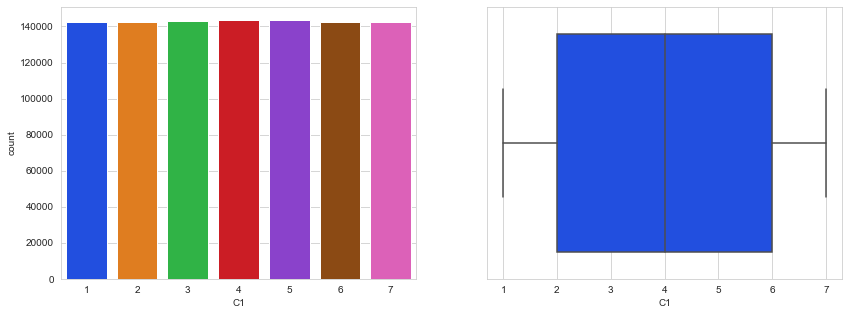

In [11]:
plt.figure(figsize=(14,5),)
plt.subplot(1,2,1)

sns.countplot(x=dataset['C1'])
plt.subplot(1,2,2)
sns.boxplot(x=dataset['C1'])

Observation: The datapoints of C1 are discrete and unifromly distributed.

Ploting the different figure for column C1

<AxesSubplot:xlabel='V1'>

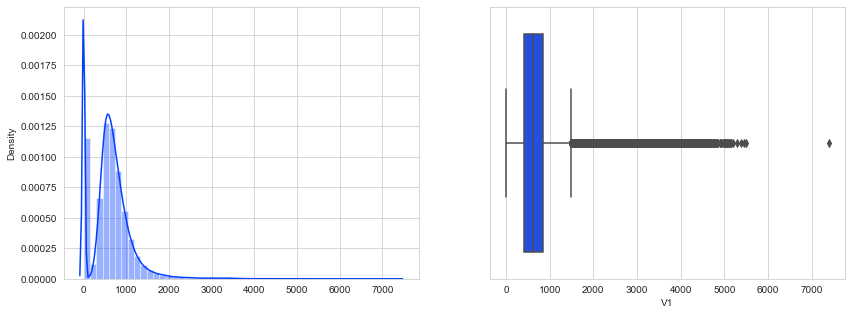

In [12]:
plt.figure(figsize=(14,5),)
plt.subplot(1,2,1)
sns.distplot(x = dataset["V1"])
plt.subplot(1,2,2)
sns.boxplot(x=dataset['V1'])

In [13]:
dataset.loc[dataset['V1']>6000,:]

,ID,C1,V1,B1,B2,B3,B4,Target
993496,817,2,7388,1,1,4,0,27190


Observation : 
1. The distplot(First figure ) shows the data is positively skewed.
2. The Box plot shows an outlier after v1>6000.

Ploting the different figure for column Target

<AxesSubplot:title={'center':'Box Plot'}, xlabel='Target'>

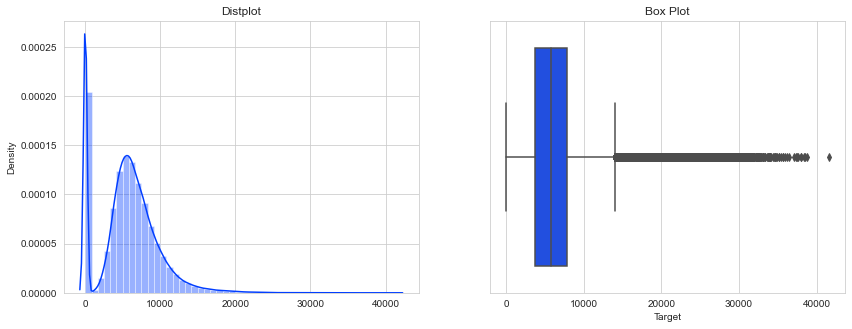

In [14]:
plt.figure(figsize=(14,5),)
plt.subplot(1,2,1)
plt.title("Distplot")
sns.distplot(x=dataset['Target'])
plt.subplot(1,2,2)
plt.title("Box Plot")
sns.boxplot(x=dataset['Target'])

Observation:
1. The distplot shows that the data is positively skewed.

Ploting the different figure for column B4

<AxesSubplot:xlabel='B4', ylabel='count'>

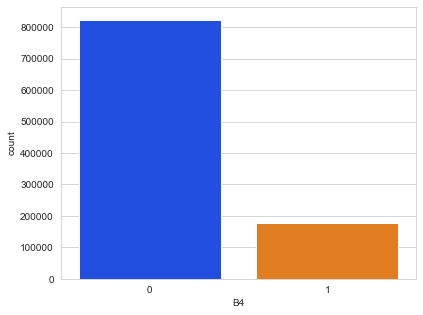

In [95]:
plt.figure(figsize=(14,5),)
plt.subplot(1,2,1)
sns.countplot(x=dataset['B4'])


In [17]:
((dataset["B4"].value_counts()/len(dataset)) * 100).round(2)

0    82.34
1    17.66
Name: B4, dtype: float64

Ploting the different figure for column B3

<AxesSubplot:xlabel='B3', ylabel='count'>

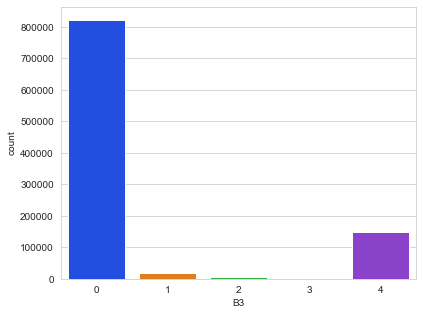

In [23]:
plt.figure(figsize=(14,5),)
plt.subplot(1,2,1)
sns.countplot(x=dataset['B3'])


In [18]:
((dataset["B3"].value_counts()/len(dataset)) * 100).round(2)

0    82.23
4    14.80
1     1.88
2     0.67
3     0.41
Name: B3, dtype: float64

### Correlation Matrix 

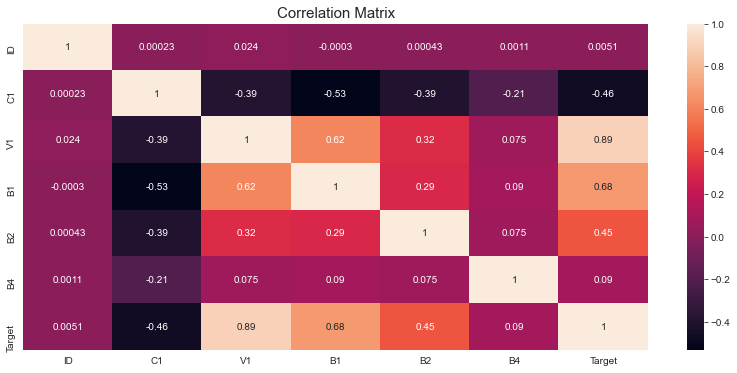

In [8]:
plt.figure(figsize=(14,6))
corr_mat = dataset.corr()
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix",size = 15)
plt.show()

#### By observing the Correlation matrix we can observe 
> 1. There is a very good positive correlation between V1 and Target(0.89).

> 2. There is a very good positive correlation between B1 and Target(0.68).

> 3. There is a good positive correlation between B2 and Target(0.45).

> 4. There is a good negative correlation between c1 and Target(-0.46).

> 5. There is a very good positive correlation between B1 and V1(0.62).


<AxesSubplot:xlabel='Target', ylabel='B1'>

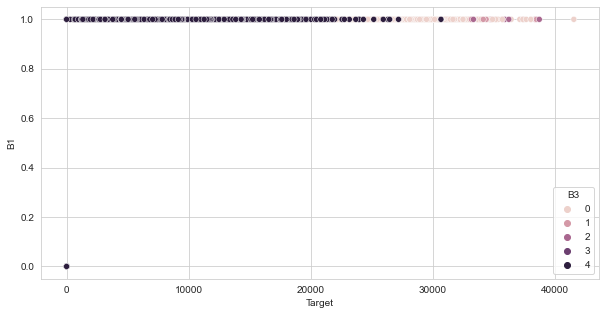

In [65]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Target',y='B1',hue='B3',data=dataset)

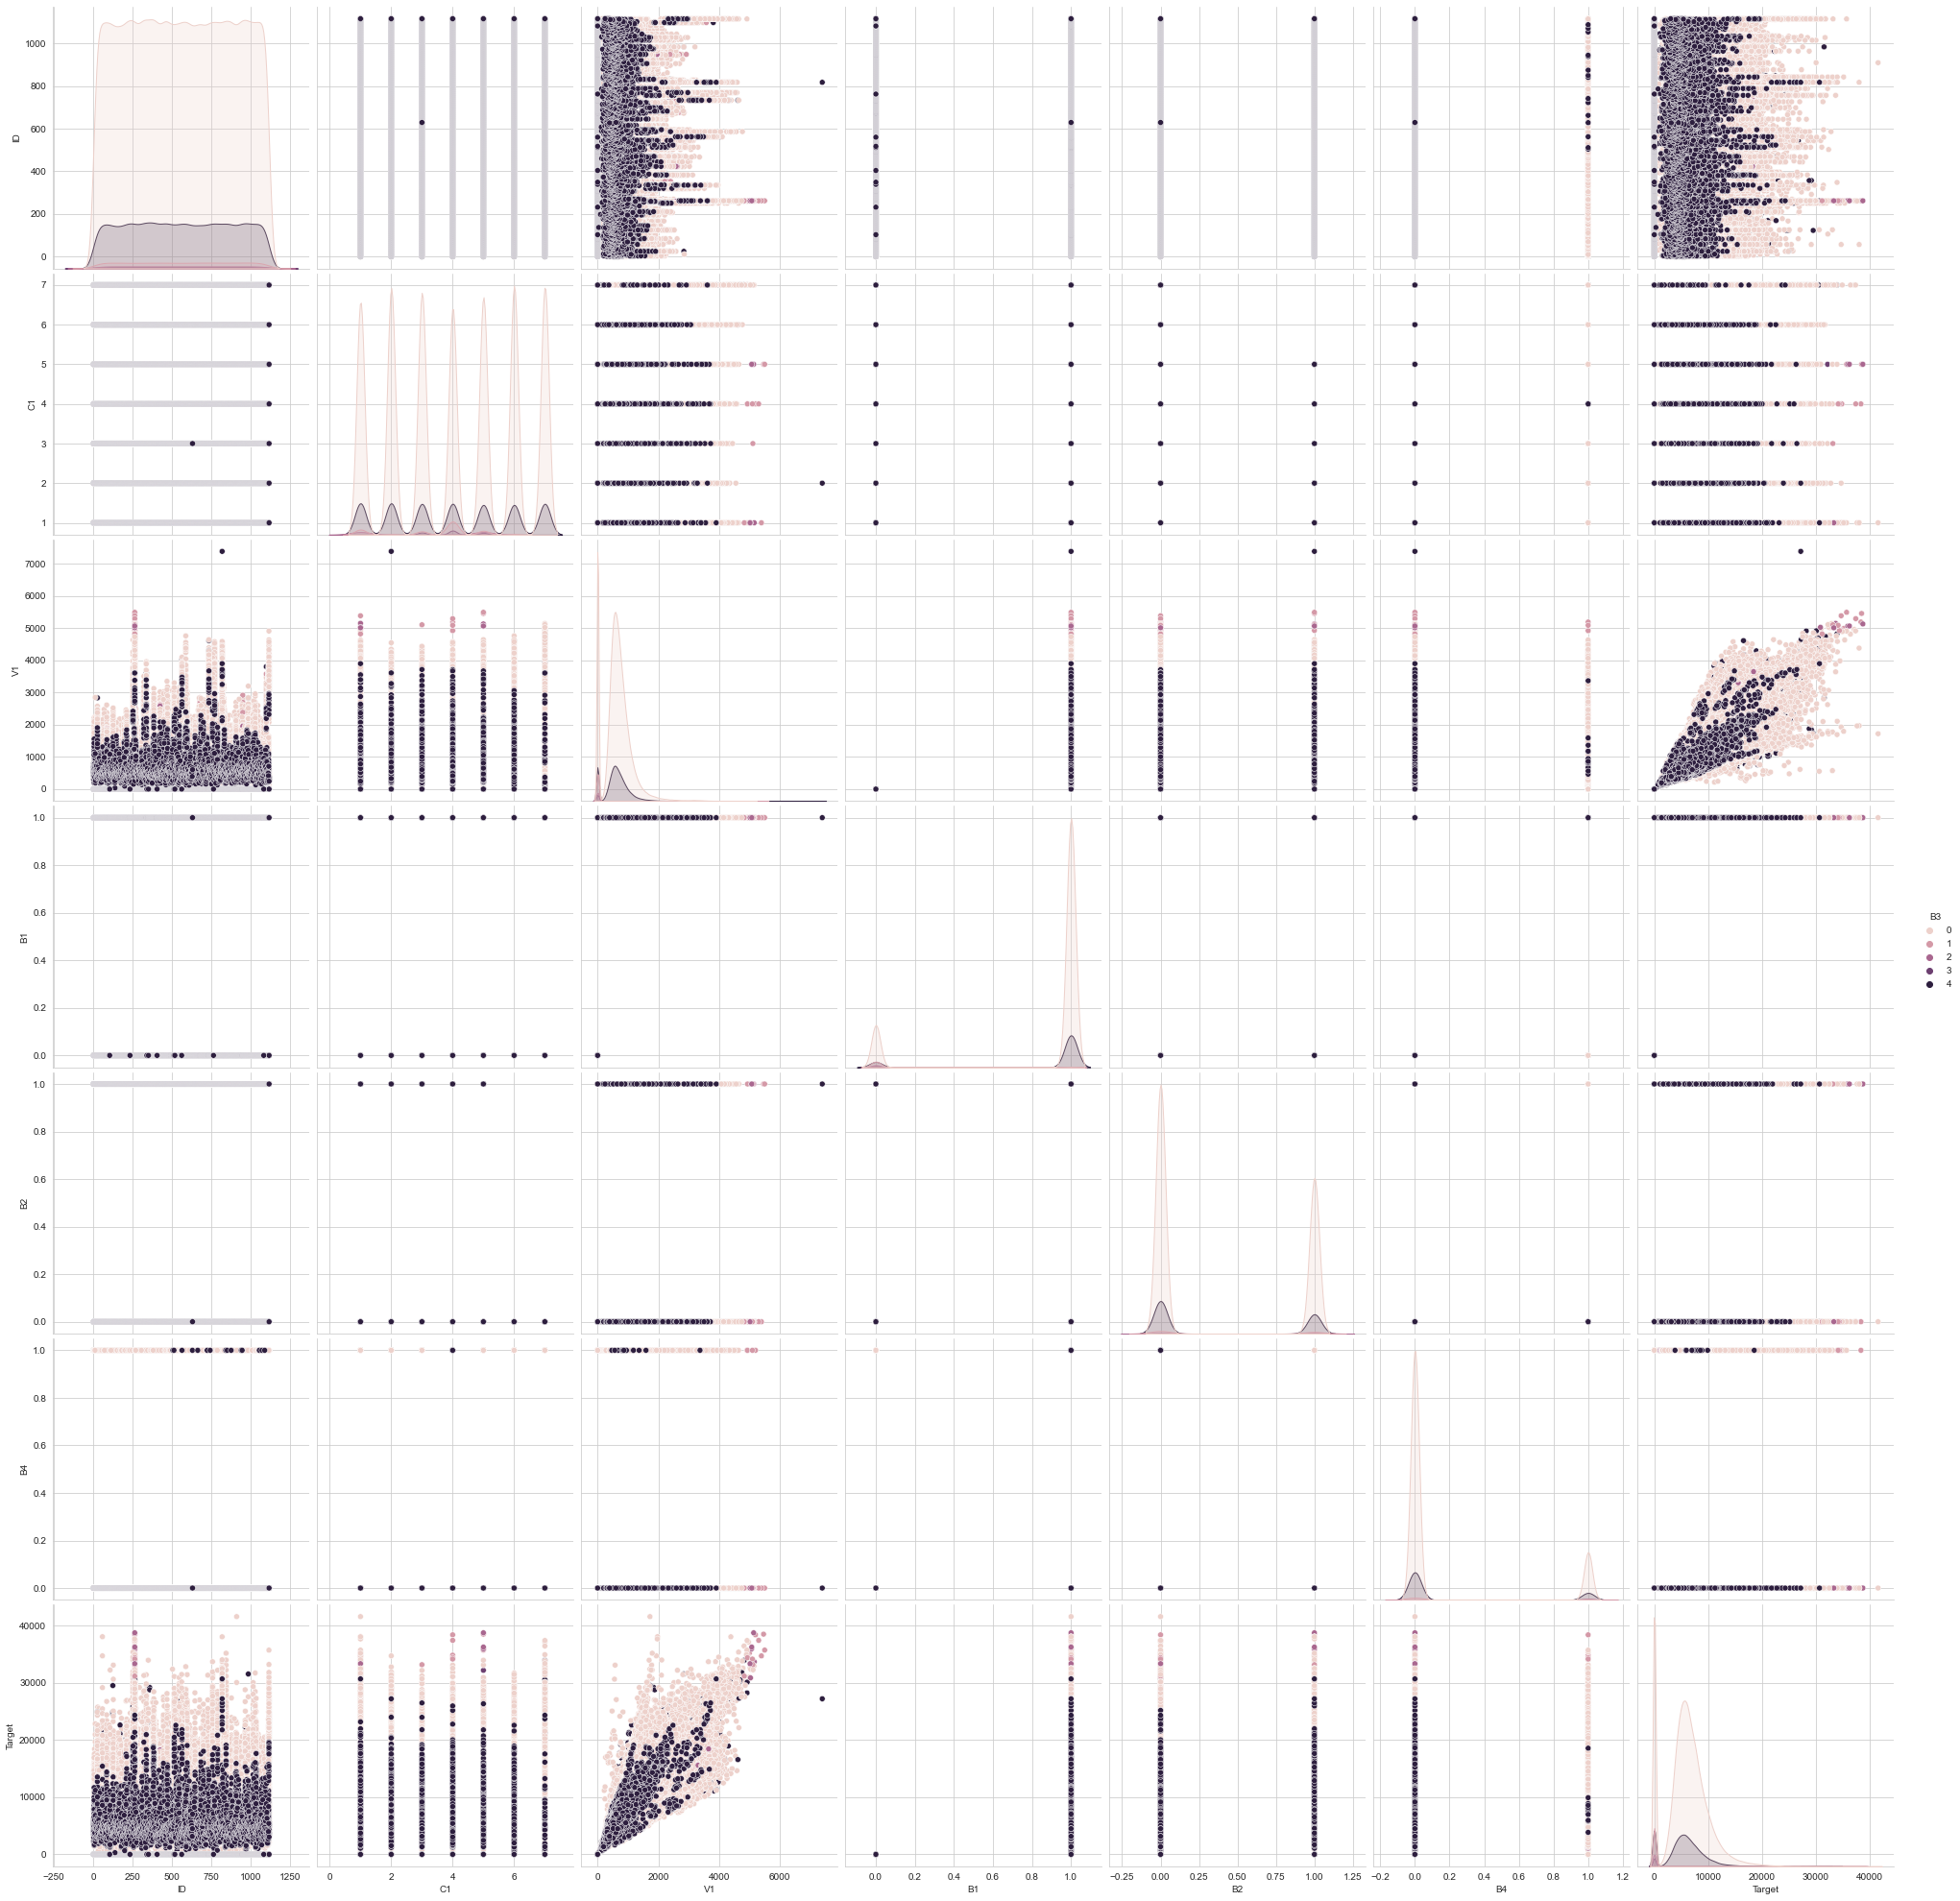

In [67]:
sns.pairplot(dataset,hue="B3",size = 4)
plt.show()

### Applying different algorithms for the given dataset

Though the dataset contains verious range of values so, it is a very good idea to scale all thoses values to a same range so that it improves our prediction results

In [28]:
sc_X = StandardScaler()
scaled_dataset = sc_X.fit_transform(dataset)

In [31]:
dataset.columns

Index(['ID', 'C1', 'V1', 'B1', 'B2', 'B3', 'B4', 'Target'], dtype='object')

In [43]:
scaled_dataset.shape

(999999, 8)

Splitting the dataset into Feature data and Label Data

In [38]:
X=scaled_dataset[:,0:7]
y=scaled_dataset[:,7]

In [44]:
X.shape

(999999, 7)

### Though the Target label has very large number of unique values, it can be concluded that this  is regression problem

Spliting the dataset into traing and testing samples.Here test sample contains 20% of the total data

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (799999, 7)
x test:  (200000, 7)
y train:  (799999,)
y test:  (200000,)


Impoting different metrics for preformance mesurement

In [51]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

Creating a model function which contais all the information about each of the implemented model . It will be very helpful for comparing the different algorithms

In [60]:
cv=5 # CV value
name = []
r_2 = [] # List for r 2 score
CV = [] # list for CV scores mean
mse = [] # list of Mean square errors
mae = [] #list of Mean Absolute Errors

# Main function for models
def model(algorithm,x_train_,y_train_,x_test_,y_test_,name_): 
    algorithm.fit(x_train_,y_train_)
    predicts=algorithm.predict(x_test_)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(y_test_,prediction)
    cross_val=cross_val_score(algorithm,x_train_,y_train_,cv=cv)
    MSE = mean_squared_error(y_test_,prediction)
    MAE = mean_absolute_error(y_test_,prediction)
    
    # Appending results to Lists 
    name.append(name_)
    r_2.append(R_2)
    CV.append(cross_val.mean())
    mse.append(MSE)
    mae.append(MAE)
    
    # Printing results  
    print(algorithm,"\n") 
    print("r_2 score :",R_2,"\n")
    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean())
 
    # Plot for prediction vs originals
    test_index=pd.DataFrame(y_test_)
    ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
    ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
    plt.legend(loc='upper right')
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()

### Linear Regrassion

LinearRegression() 

r_2 score : 0.8529702024352452 

CV scores: [0.85230748 0.85372012 0.84955267 0.85239643 0.85268541] 

CV scores mean: 0.8521324235095393
type of prediction:  <class 'pandas.core.frame.DataFrame'>


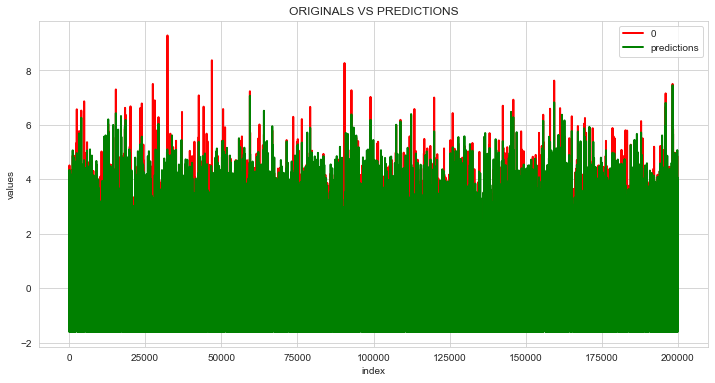

In [62]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,x_train,y_train,x_test,y_test,"Linear Regression")

### Lesso and Grid Search

In [65]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-3,3,num=14) # range for alpha

grid = GridSearchCV(estimator=Lasso(), param_grid=dict(alpha=alphas))
grid.fit(x_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.8521278679541939
0.001


Lasso(alpha=0.001, normalize=True) 

r_2 score : -1.1810226425934545e-05 

CV scores: [0.15820875 0.15872449 0.15851408 0.15703906 0.15872086] 

CV scores mean: 0.15824144799772527
type of prediction:  <class 'pandas.core.frame.DataFrame'>


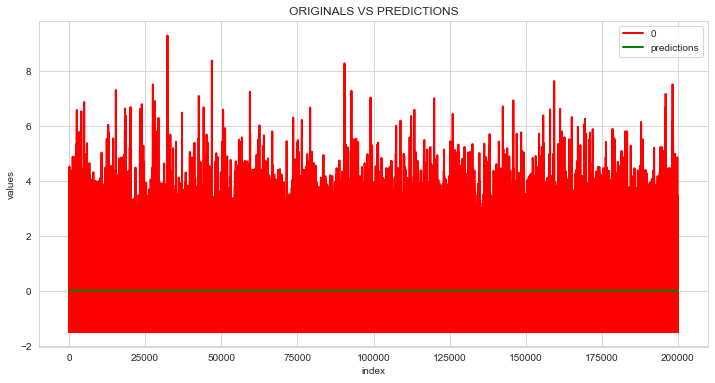

In [66]:
ls = Lasso(alpha = grid.best_estimator_.alpha, normalize = True) # applied the best estimator
model(ls,x_train,y_train,x_test,y_test,"Lasso")

### Ridge Regrassion

Ridge(alpha=0.01, normalize=True) 

r_2 score : 0.852809395162996 

CV scores: [0.85222776 0.85369063 0.84947435 0.85227737 0.85266225] 

CV scores mean: 0.852066471465769
type of prediction:  <class 'pandas.core.frame.DataFrame'>


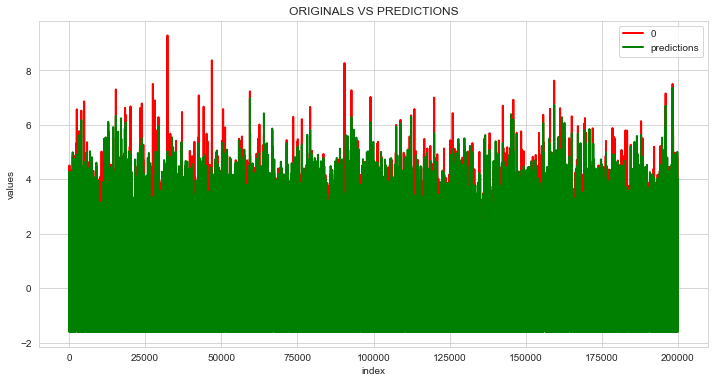

In [68]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.01, normalize = True) # applied the best estimator
model(ridge,x_train,y_train,x_test,y_test,"Ridge")

### DecisionTree Regressor

DecisionTreeRegressor() 

r_2 score : 0.9561594497677823 

CV scores: [0.95052663 0.95274878 0.94987759 0.95102473 0.95027232] 

CV scores mean: 0.9508900098854252
type of prediction:  <class 'pandas.core.frame.DataFrame'>


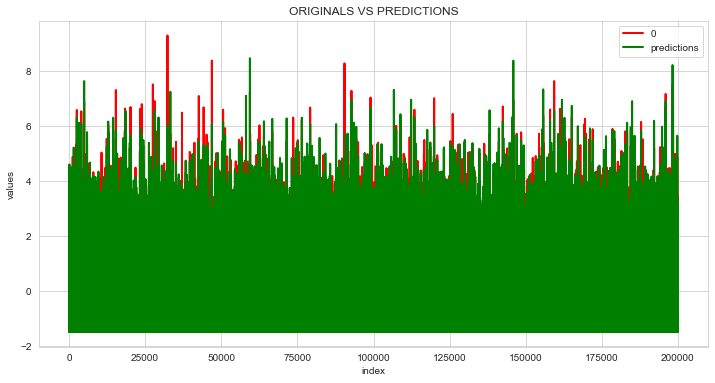

In [69]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
model(dtr,x_train,y_train,x_test,y_test,"Decision Tree")

### Random Forest Regressor

RandomForestRegressor(n_estimators=40) 

r_2 score : 0.9719744251341618 

CV scores: [0.96968067 0.97034344 0.96808087 0.96965839 0.96947494] 

CV scores mean: 0.9694476613686526
type of prediction:  <class 'pandas.core.frame.DataFrame'>


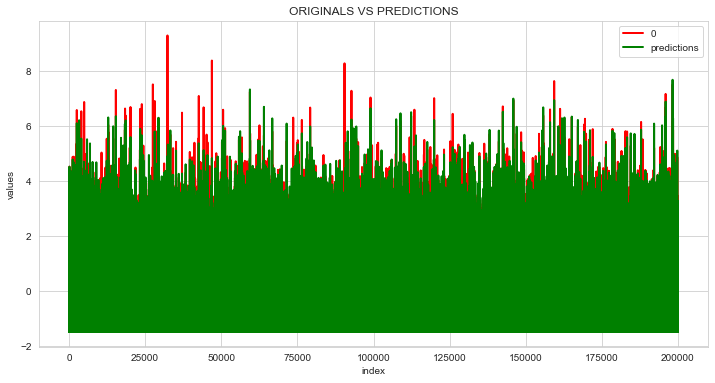

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=40)
model(rf,x_train,y_train,x_test,y_test,"Random Forest")

### KNN

RandomForestRegressor(n_estimators=40) 

r_2 score : 0.9721073634432373 

CV scores: [0.9695485  0.97004523 0.96815384        nan 0.96950358] 

CV scores mean: nan
type of prediction:  <class 'pandas.core.frame.DataFrame'>


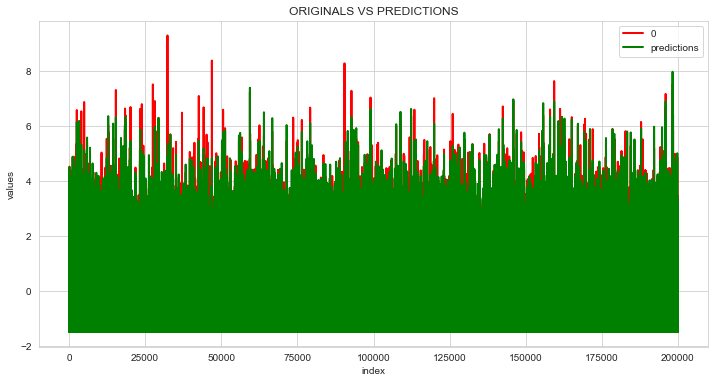

In [97]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=10)

model(rf,x_train,y_train,x_test,y_test,"KNN")


### Comparison of the implemented models

In [98]:
results=pd.DataFrame({'Model': name,'R Squared': r_2,'CV score mean': CV,'Mean Square Error' : mse,'Root mean Squared Error':np.sqrt(mse),'Mean Absolute error': mae})
results

,Model,R Squared,CV score mean,Mean Square Error,Root mean Squared Error,Mean Absolute error
0,Linear Regression,0.852970,0.852132,0.148203,0.384971,0.257251
1,Linear Regression,0.852970,0.852132,0.148203,0.384971,0.257251
2,Lasso,-0.000012,0.158241,1.007989,1.003987,0.751682
3,Ridge,0.852809,0.852066,0.148365,0.385181,0.257628
4,Decision Tree,0.956159,0.950890,0.044190,0.210215,0.117106
5,Random Forest,0.971974,0.969448,0.028249,0.168075,0.097292
6,KNN,0.972107,NaN,0.028115,0.167676,0.097098


### Conclusion
From the  above table we can conclude that Random Forest and KNN outperforms rest of the models tested.